In [3]:
import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
controle = r'''C:\Users\jonat\OneDrive\Documents\Protocolo_PKS\Protocolo_PKS\dados_edf\controle\1\Antônia Perpetuo Borges - Dia 17.12.11 as 09.07.55.edf'''

In [22]:
edfC = pyedflib.EdfReader(controle)
n = edfC.signals_in_file
sigbufs = np.zeros((n, edfC.getNSamples()[0]))
for i in np.arange(n):
     sigbufs[i, :] = edfC.readSignal(i)
edfC._close()

df = pd.DataFrame(data=sigbufs.T, columns=['ch1', 'ch2', 'ch3', 'ch4'])

In [25]:
df.head()

,ch1,ch2,ch3,ch4
0,14.773171,-4.924510,7.530284,-4.073199
1,17.597561,-4.924510,11.754890,-5.481268
2,10.536585,-4.924510,11.754890,-13.929683
3,7.712195,-10.567647,18.795899,-9.705476
4,7.712195,-9.156863,15.979495,-6.889337


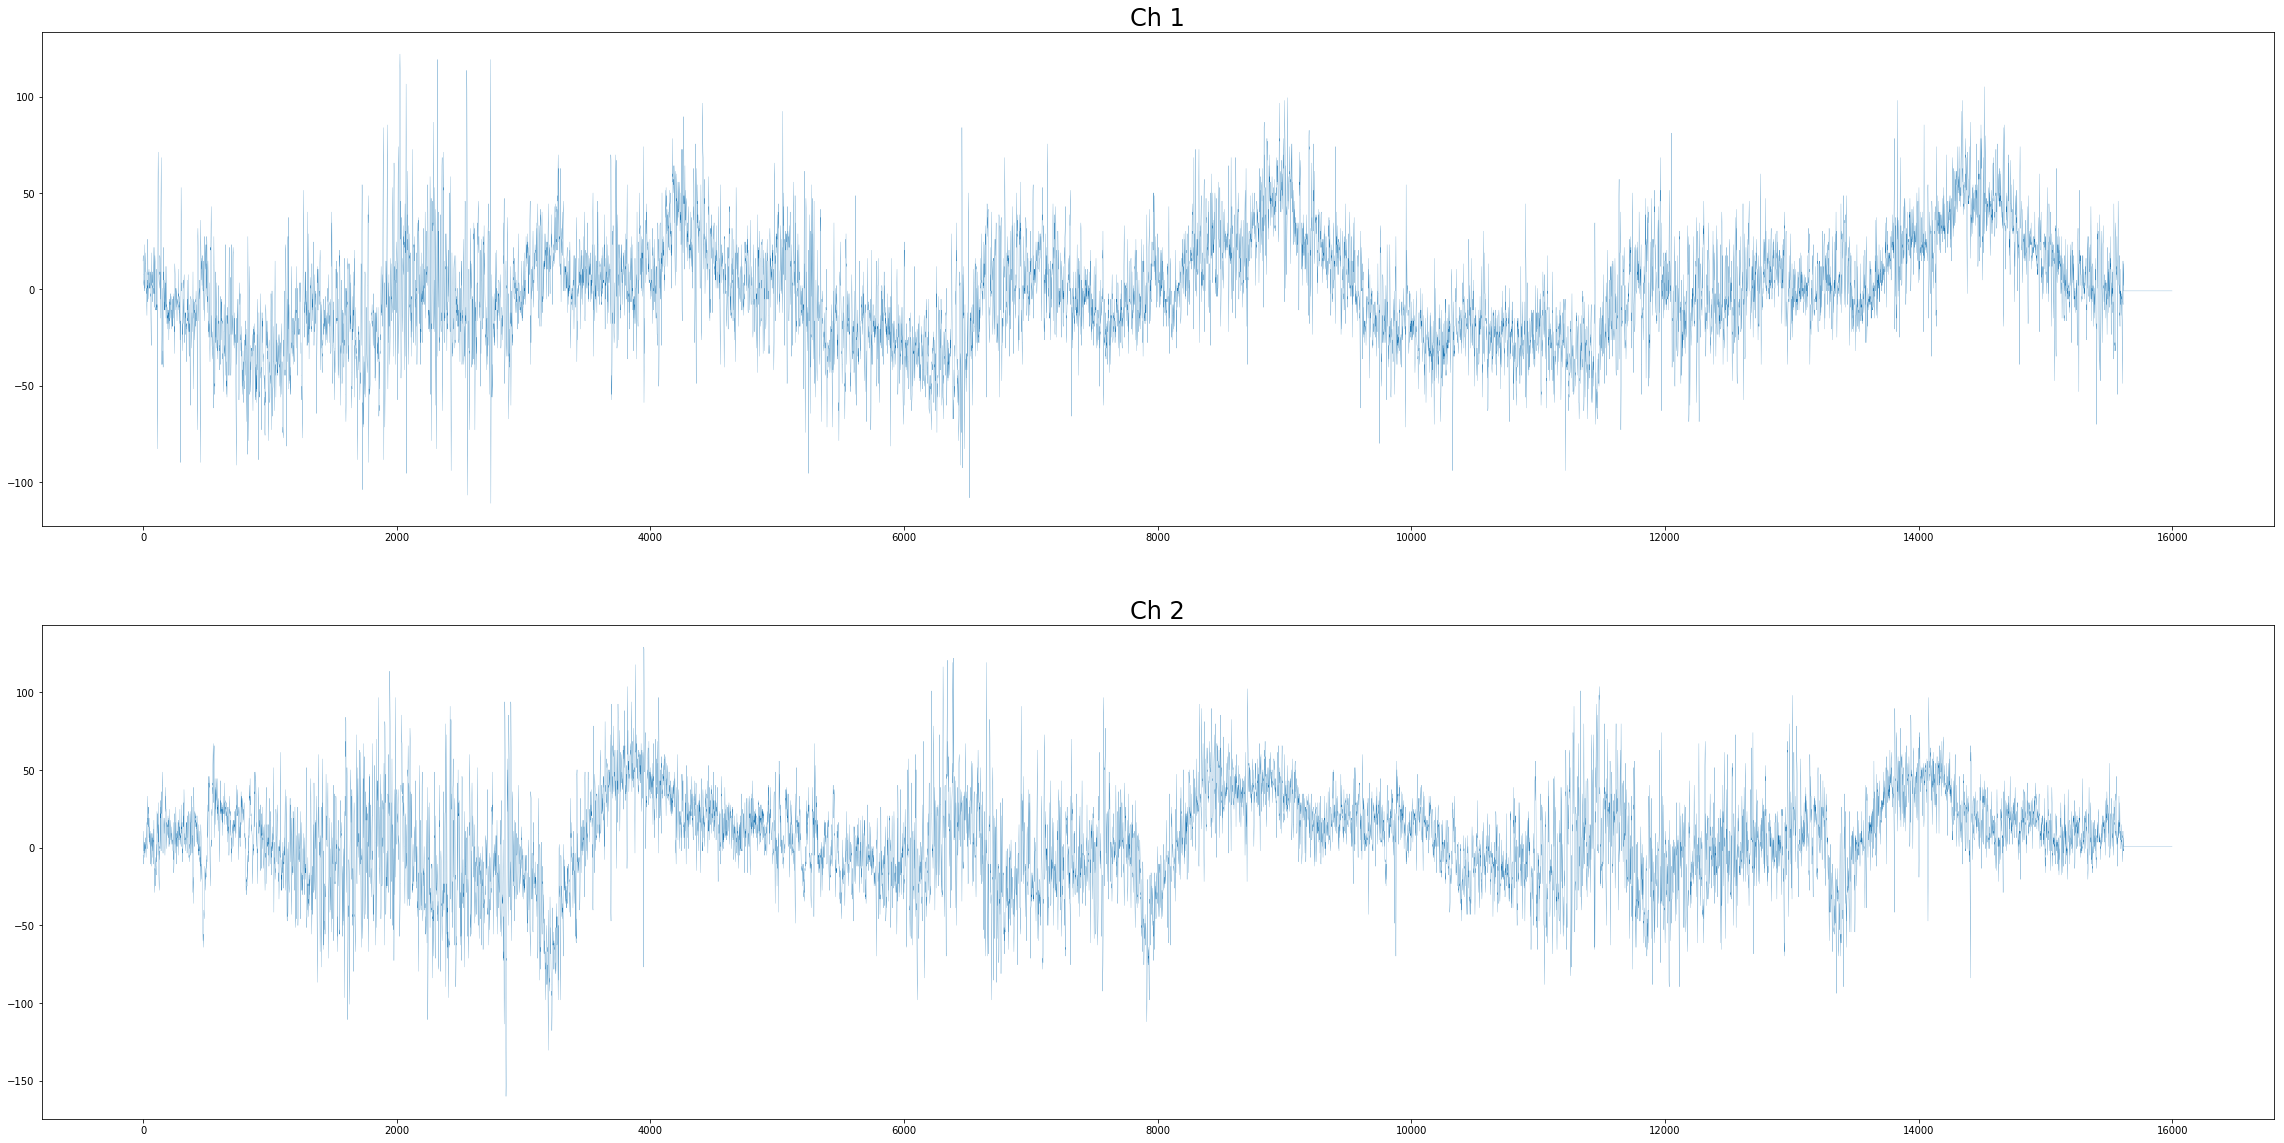

In [40]:
plt.figure(figsize=(40,20))
plt.subplot(211)
plt.title('Ch 1',fontsize=24)
plt.plot(df['ch1'], linewidth=0.2)

plt.subplot(212)
plt.title('Ch 2',fontsize=24)
plt.plot(df['ch2'], linewidth=0.2)
plt.show()

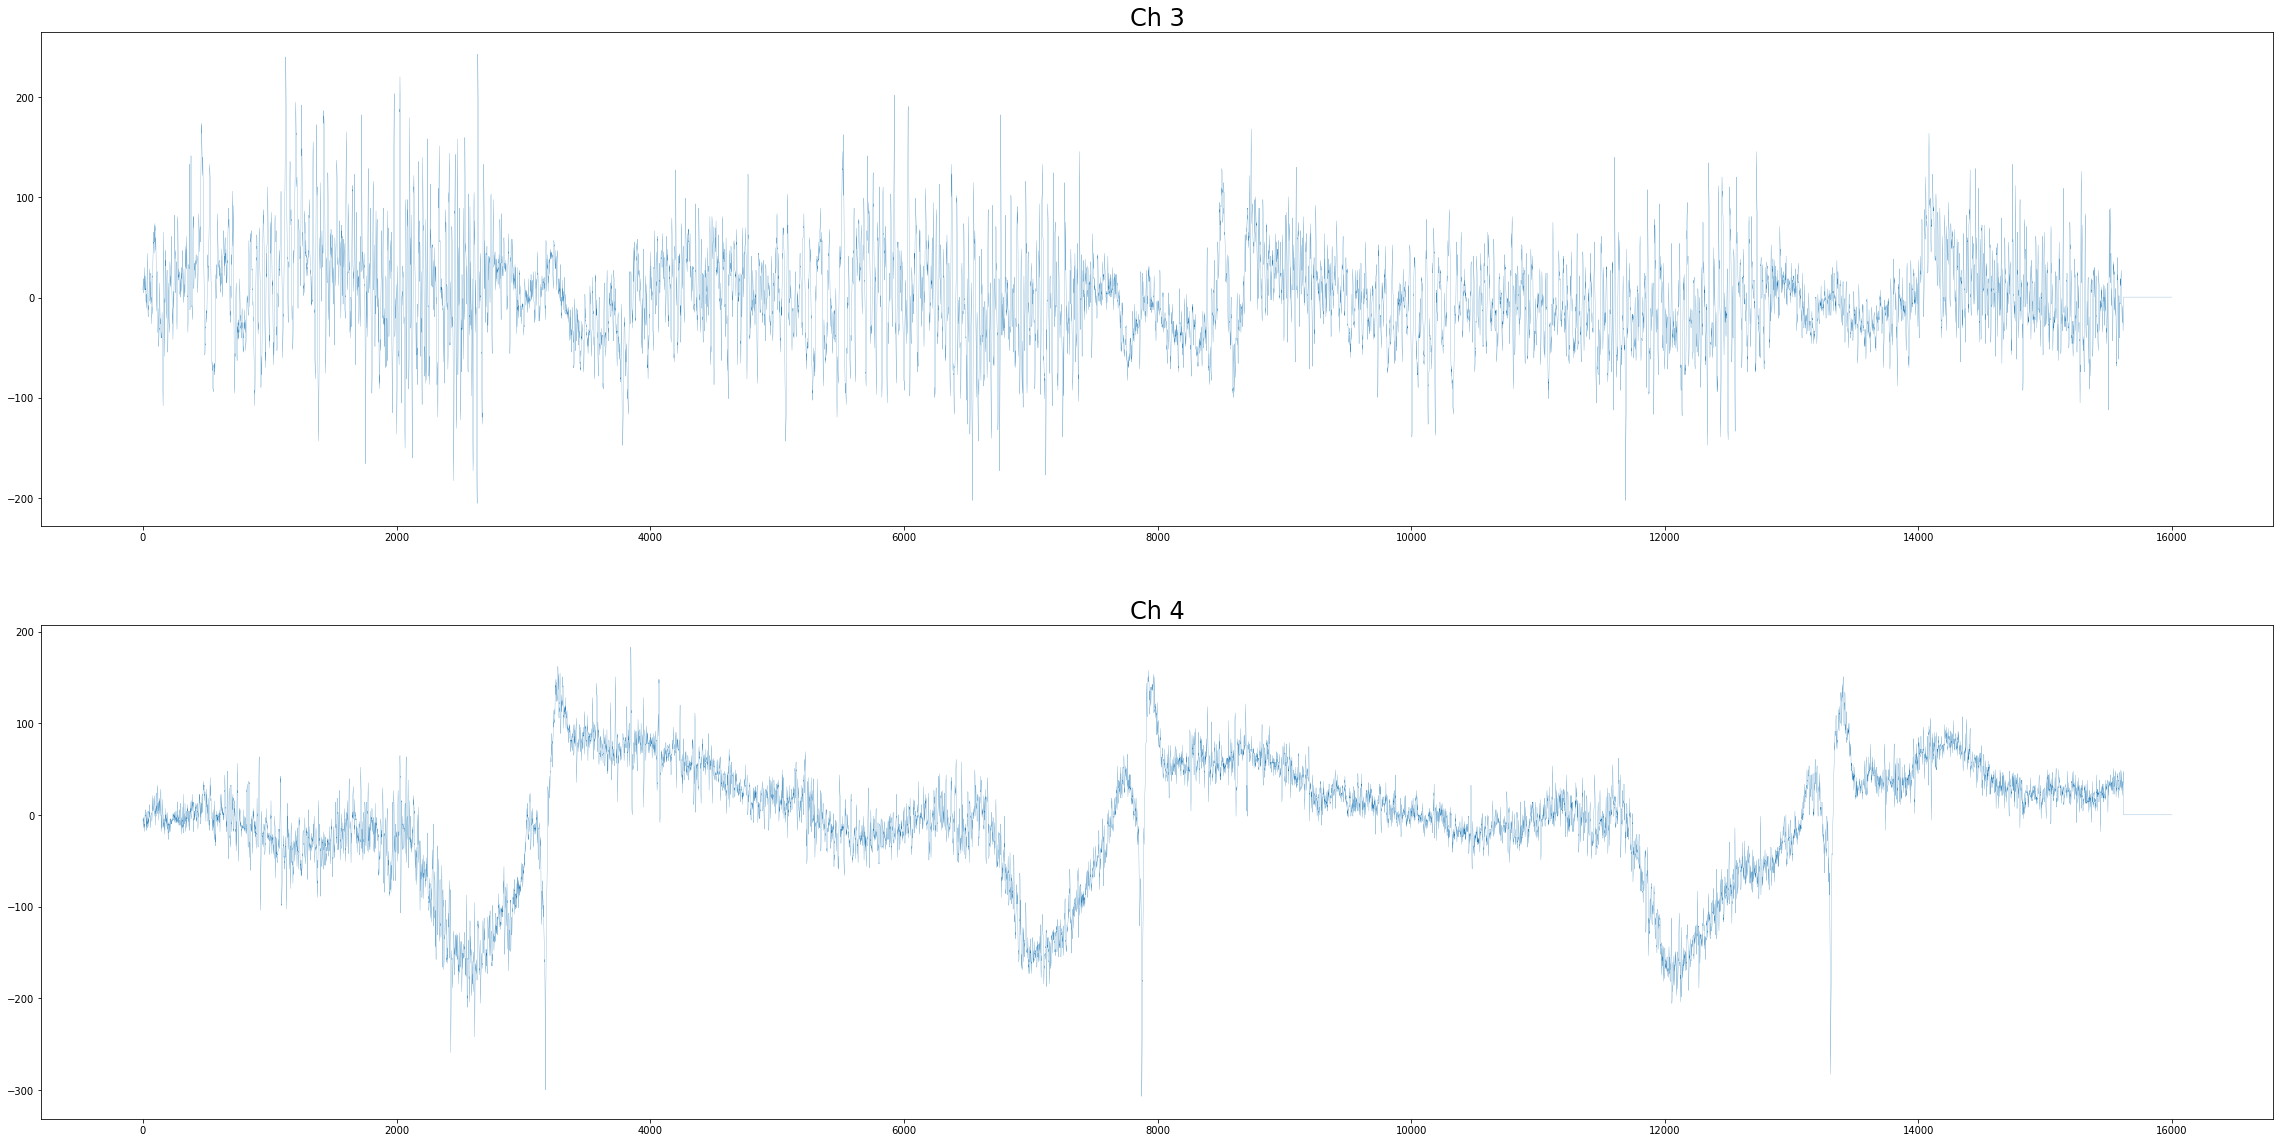

In [41]:
plt.figure(figsize=(40,20))
plt.subplot(211)
plt.title('Ch 3',fontsize=24)
plt.plot(df['ch3'], linewidth=0.2)

plt.subplot(212)
plt.title('Ch 4',fontsize=24)
plt.plot(df['ch4'], linewidth=0.2)
plt.show()

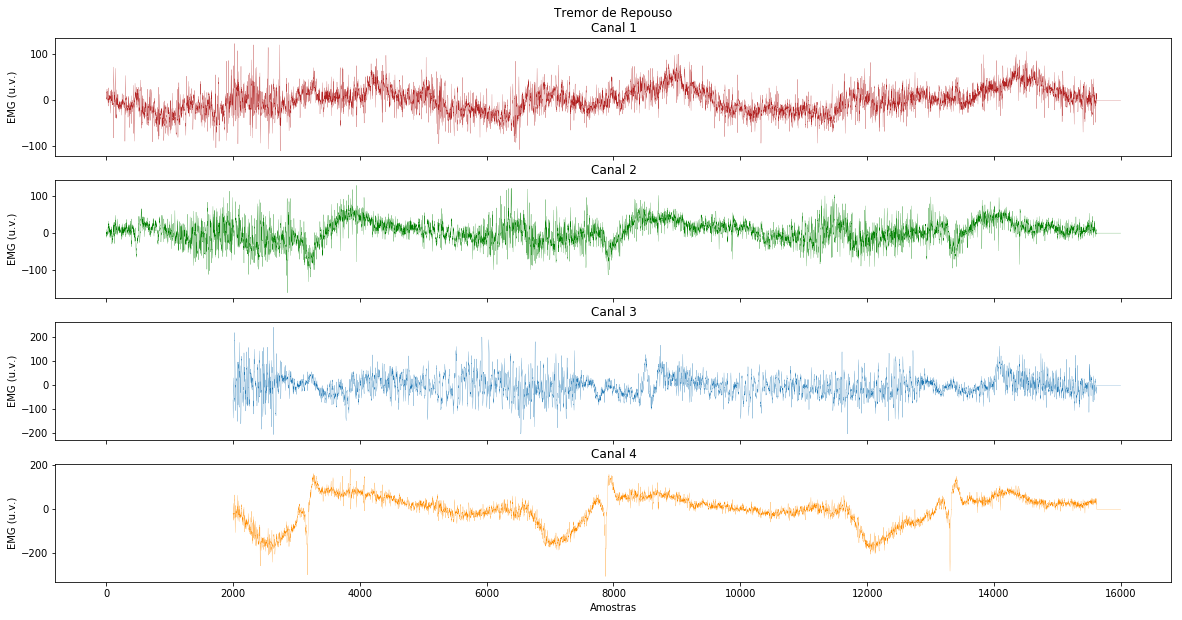

<Figure size 2880x1440 with 0 Axes>

In [81]:
def plotar(df):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
    
    plt.figure(figsize=(40,20))
    ax1.plot(df['ch1'], linewidth=0.2, color = '#B22222')
    ax1.set_title('Tremor de Repouso'+'\nCanal 1')
    ax1.set_ylabel('EMG (u.v.)')

    ax2.plot(df['ch2'], linewidth=0.2, color = '#008000')
    ax2.set_title('\nCanal 2')
    ax2.set_ylabel('EMG (u.v.)')
    
    ax3.plot(df['ch3'][2000:], linewidth=0.2)
    ax3.set_title('\nCanal 3')
    ax3.set_ylabel('EMG (u.v.)')

    ax4.plot(df['ch4'][2000:], linewidth=0.2, color = '#FF8C00')
    ax4.set_title('\nCanal 4')
    ax4.set_ylabel('EMG (u.v.)')
    ax4.set_xlabel('Amostras')
    
    f.set_size_inches(w=20,h=10)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
plotar(df)